## Import Libraries

In [1]:
import pandas as pd
import talib as ta
import yfinance as yf
import matplotlib.pyplot as plt

## Load Cleaned Data (from Day 1)

In [2]:
# Load the cleaned QQQ data
df = pd.read_csv("QQQ_Clean_Data.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)  # Set Date as index for time-series operations
print("Initial Data:")
display(df.head())

Initial Data:


,Open,High,Low,Close,Volume
Date,,,,,
2024-01-02,402.841712,403.089865,397.283078,399.615723,58026900
2024-01-03,396.975393,398.037495,394.950486,395.387207,47002800
2024-01-04,393.511208,396.637931,393.134011,393.352386,39432800
2024-01-05,393.521137,396.608147,392.419322,393.818909,44867900
2024-01-08,395.049710,402.246149,394.900825,401.958313,42473800


# Calculate Technical Indicators

## Relative Strength Index (RSI)

In [3]:
df["RSI_14"] = ta.RSI(df["Close"], timeperiod=14)

## Moving Average Convergence Divergence (MACD)

In [4]:
macd, macd_signal, _ = ta.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)
df["MACD"] = macd
df["MACD_Signal"] = macd_signal

## Average True Range (ATR)

In [5]:
df["ATR_14"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=14)

## Bollinger Bands

In [6]:
upper, middle, lower = ta.BBANDS(df["Close"], timeperiod=20)
df["Bollinger_Upper"] = upper
df["Bollinger_Middle"] = middle
df["Bollinger_Lower"] = lower

## Fetch and Merge VIXCLS (Volatility Index) Data

In [7]:
# Fetch VIXCLS data
vix = yf.download("^VIX", start=df.index.min(), end=df.index.max(), progress=False)
vix = vix[["Close"]].rename(columns={"Close": "VIXCLS"})

# Reset index for both DataFrames to convert index to a column
df_reset = df.reset_index()
vix_reset = vix.reset_index()

# Merge on the "Date" column
df_merged = pd.merge(df_reset, vix_reset, on="Date", how="left")

# Set "Date" back as the index
df = df_merged.set_index("Date")

# Display merged data
print("\nData with VIXCLS:")
display(df.tail())

YF.download() has changed argument auto_adjust default to True

Data with VIXCLS:


C:\Users\DATA-JOHN\AppData\Local\Temp\ipykernel_11248\2218961081.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_merged = pd.merge(df_reset, vix_reset, on="Date", how="left")
C:\Users\DATA-JOHN\AppData\Local\Temp\ipykernel_11248\2218961081.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_merged = pd.merge(df_reset, vix_reset, on="Date", how="left")


,Open,High,Low,Close,Volume,RSI_14,MACD,MACD_Signal,ATR_14,Bollinger_Upper,Bollinger_Middle,Bollinger_Lower,"(VIXCLS, ^VIX)"
Date,,,,,,,,,,,,,
2025-03-19,476.100008,484.607311,474.162895,480.173950,40430300,40.697011,-11.997114,-11.028607,11.189526,532.963727,494.340308,455.716888,19.900000
2025-03-20,476.169895,483.828457,475.470925,478.546356,36780500,39.944797,-11.515770,-11.126040,10.987240,525.414417,491.446126,457.477834,19.799999
2025-03-21,473.374049,480.892835,472.205809,480.123993,42234900,41.081575,-10.881563,-11.077144,10.822939,519.681853,489.187494,458.693134,19.280001
2025-03-24,487.739990,491.510010,484.399994,490.660004,34567200,48.141482,-9.420191,-10.745754,10.863159,515.030168,487.765700,460.501231,17.480000
2025-03-25,491.390015,493.619995,490.420013,493.459991,26035200,49.860929,-7.944529,-10.185509,10.315789,511.776519,486.810916,461.845313,NaN


## Handle Missing Values

In [8]:
# Drop rows with NaN (e.g., first 20 days due to Bollinger Bands/RSI windowing)
df.dropna(inplace=True)

# Check for remaining missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Open                0
High                0
Low                 0
Close               0
Volume              0
RSI_14              0
MACD                0
MACD_Signal         0
ATR_14              0
Bollinger_Upper     0
Bollinger_Middle    0
Bollinger_Lower     0
(VIXCLS, ^VIX)      0
dtype: int64


## Save Preprocessed Data

In [9]:
df.to_csv("QQQ_Engineered_Data.csv")
print("\nData saved to QQQ_Engineered_Data.csv")


Data saved to QQQ_Engineered_Data.csv


## Visualize Features

### Bollinger Bands

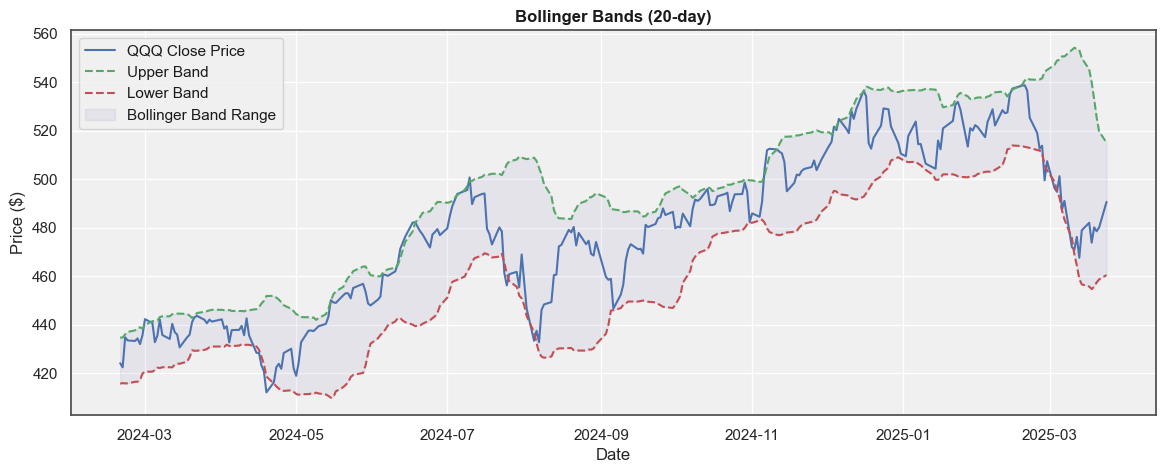

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(
    style="whitegrid",
    rc={
        "axes.facecolor": "#f0f0f0",  # Light grey background
        "grid.color": "white",
        "axes.edgecolor": "0.3",
        "text.color": "0.1"
    }
)

# Bollinger Bands Plot
plt.figure(figsize=(14, 5))
plt.plot(df["Close"], color=sns.color_palette("deep")[0], label="QQQ Close Price")
plt.plot(df["Bollinger_Upper"], color=sns.color_palette("deep")[2], linestyle="--", label="Upper Band")
plt.plot(df["Bollinger_Lower"], color=sns.color_palette("deep")[3], linestyle="--", label="Lower Band")
plt.fill_between(
    df.index,
    df["Bollinger_Upper"],
    df["Bollinger_Lower"],
    color=sns.color_palette("deep")[4],
    alpha=0.1,
    label="Bollinger Band Range"
)
plt.title("Bollinger Bands (20-day)", fontsize=12, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend(loc="upper left")
plt.show()

### Relative Strength Index (RSI)

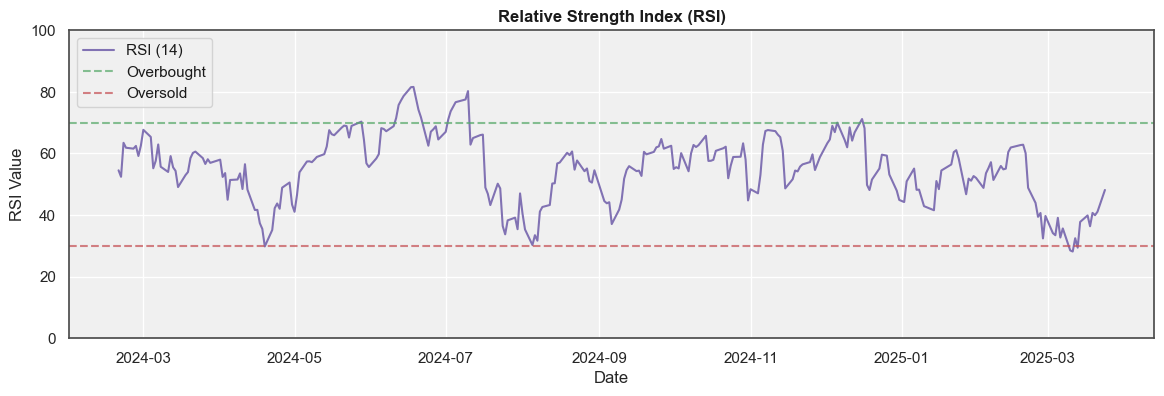

In [11]:
# RSI Plot
plt.figure(figsize=(14, 4))
plt.plot(df["RSI_14"], color=sns.color_palette("deep")[4], linewidth=1.5, label="RSI (14)")
plt.axhline(70, color=sns.color_palette("deep")[2], linestyle="--", alpha=0.7, label="Overbought")
plt.axhline(30, color=sns.color_palette("deep")[3], linestyle="--", alpha=0.7, label="Oversold")
plt.title("Relative Strength Index (RSI)", fontsize=12, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.ylim(0, 100)
plt.legend(loc="upper left")
plt.show()

### MACD

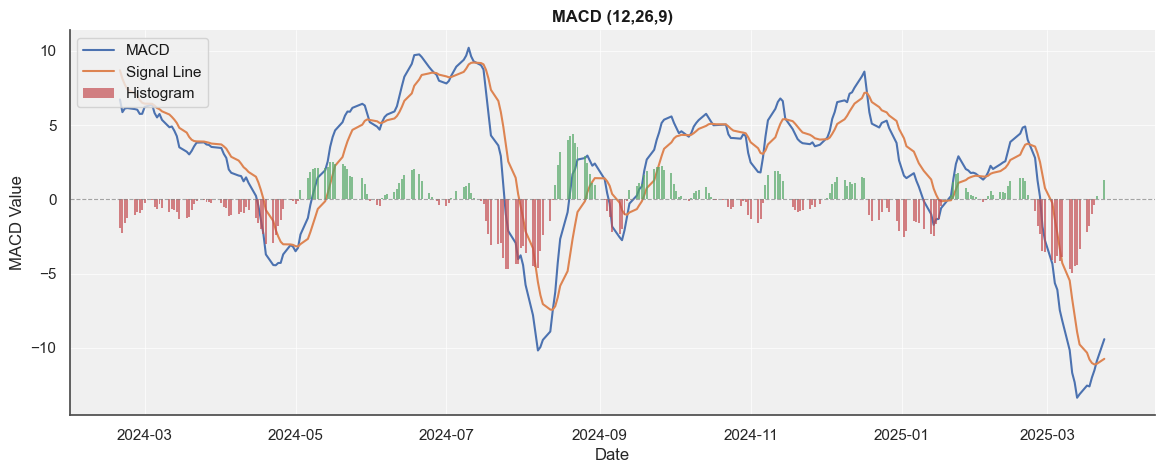

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
palette = sns.color_palette("deep")
color_macd = palette[0]    # Blue for MACD line
color_signal = palette[1]  # Orange for Signal line
color_up = palette[2]      # Green for bullish histogram
color_down = palette[3]    # Red for bearish histogram

# Calculate histogram values
histogram = df["MACD"] - df["MACD_Signal"]

# MACD Plot
plt.figure(figsize=(14, 5))
plt.plot(df["MACD"], color=color_macd, linewidth=1.5, label="MACD")
plt.plot(df["MACD_Signal"], color=color_signal, linewidth=1.5, label="Signal Line")

# Plot histogram bars
plt.bar(
    df.index,
    histogram,
    color=[color_up if val > 0 else color_down for val in histogram],
    alpha=0.7,  # Increased opacity
    width=0.8,  # Adjusted width for daily data
    edgecolor="none",  # Remove bar edges for cleaner look
    label="Histogram",
    zorder=2  # Ensure bars are plotted on top
)

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)
plt.title("MACD (12,26,9)", fontsize=12, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend(loc="upper left")
plt.grid(True, color="white", linestyle="-", linewidth=0.5)
plt.gca().set_facecolor("#f0f0f0")  # Light grey background
sns.despine()
plt.show()

### Average True Range (ATR)

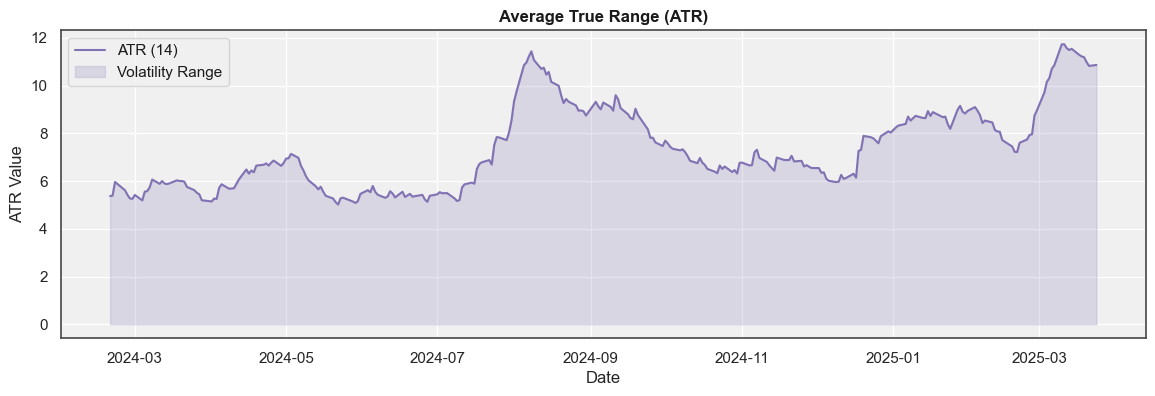

In [13]:
# ATR Plot
plt.figure(figsize=(14, 4))
plt.plot(df["ATR_14"], color=sns.color_palette("deep")[4], linewidth=1.5, label="ATR (14)")
plt.fill_between(
    df.index,
    df["ATR_14"],
    color=sns.color_palette("deep")[4],
    alpha=0.2,
    label="Volatility Range"
)
plt.title("Average True Range (ATR)", fontsize=12, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("ATR Value")
plt.legend(loc="upper left")
plt.show()